# **Info**

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

# **Setup**

In [27]:
# Start your code here!
import pandas as pd
import pingouin 
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# **Import Data**

In [28]:
women = pd.read_csv('women_results.csv')
print(women.shape)
women.head()

(4884, 7)


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [29]:
men = pd.read_csv('men_results.csv')
print(men.shape)
men.head()

(44353, 7)


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


# **Data Processing**

## **Filter Data**

In [30]:
men['date'] = pd.to_datetime(men['date'])
women['date'] = pd.to_datetime(women['date'])

In [31]:
men['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [32]:
men_subset = men[(men['date']>='2002-01-01') & (men['tournament']=='FIFA World Cup')]
print(men_subset.shape)

women_subset = women[(women['date']>='2002-01-01') & (women['tournament']=='FIFA World Cup')]
print(women_subset.shape)

(384, 7)
(200, 7)


## **Add Group Column**

In [33]:
men_subset["group"] = "men"
women_subset["group"] = "women"

display(men_subset.head())
display(women_subset.head())

C:\Users\aksha\AppData\Local\Temp\ipykernel_17016\4005009830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
C:\Users\aksha\AppData\Local\Temp\ipykernel_17016\4005009830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women


## **Total Score Column**

In [34]:
men_subset['score'] = men_subset['home_score'] + men_subset['away_score']
men_subset.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_17016\1484358946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset['score'] = men_subset['home_score'] + men_subset['away_score']


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,score
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


In [35]:
women_subset['score'] = women_subset['home_score'] + women_subset['away_score']
women_subset.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_17016\171408650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset['score'] = women_subset['home_score'] + women_subset['away_score']


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,score
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


# **Hypotheis Testing**

In [36]:
print('Women Mean Score: ',women_subset['score'].mean())
print('Men Mean Score: ',men_subset['score'].mean())

Women Mean Score:  2.98
Men Mean Score:  2.5130208333333335


## **Normality Check**

200
ShapiroResult(statistic=0.8491019332746058, pvalue=3.8908293844628985e-13)


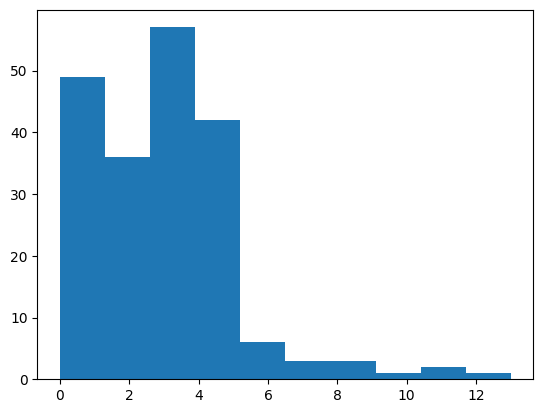

In [37]:
print(len(women_subset['score']))
print(shapiro(women_subset['score']))

plt.hist(women_subset['score'])
plt.show()

384
ShapiroResult(statistic=0.9266493059134338, pvalue=8.894989197030093e-13)


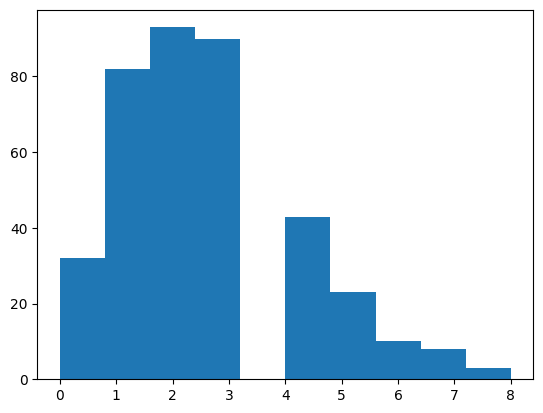

In [38]:
print(len(men_subset['score']))
print(shapiro(men_subset['score']))

plt.hist(men_subset['score'])
plt.show()

## **Convert To Wide Table**

In [39]:
both = pd.concat([women_subset,men_subset],axis=0,ignore_index=True)
both

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,score
0,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
2,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
3,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
4,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4
...,...,...,...,...,...,...,...,...,...
579,44343,2022-12-10,England,France,1,2,FIFA World Cup,men,3
580,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,men,3
581,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,men,2
582,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,men,3


In [40]:
both_subset = both[['score','group']]
both_subset_wide = both_subset.pivot(columns='group', values='score')
both_subset_wide

group,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0
...,...,...
579,3.0,NaN
580,3.0,NaN
581,2.0,NaN
582,3.0,NaN


## **Test**

Considering that both the data samples are not normal, we will have to use a non-paramtetric test to compare their means. Additionally, since the samples are unpaired, we can use Mann-Whitney U-test.

In [41]:
import pingouin

results = pingouin.mwu(x=both_subset_wide['women'],y=both_subset_wide['men'],alternative='greater')
results

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [42]:
p_val = results['p-val'].values[0]
print(p_val)

result = 'reject'
print(result)

0.005106609825443641
reject


## **Result**

In [43]:
# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}

## **Conclusion**

Considering that p-value < significance level, we can reject the null hypothesis.